In [2]:
#Wine Quality Classification using SEMMA Methodology
#Dataset: Wine Quality Dataset
#Methodology: SEMMA (Sample, Explore, Modify, Model, Assess)

# ============================================================================
# CELL 1: Install Libraries and Load Data
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load Wine Quality Dataset
# You can download from: https://archive.ics.uci.edu/ml/datasets/wine+quality
# For this example, we'll create a URL-based loader

print("=" * 60)
print("WINE QUALITY CLASSIFICATION - SEMMA METHODOLOGY")
print("=" * 60)

# Load red wine data
url_red = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

try:
    df_red = pd.read_csv(url_red, sep=';')
    df_white = pd.read_csv(url_white, sep=';')
    
    # Add wine type column
    df_red['wine_type'] = 'red'
    df_white['wine_type'] = 'white'
    
    # Combine datasets
    df = pd.concat([df_red, df_white], axis=0, ignore_index=True)
    
    print("✅ Data loaded successfully!")
    print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
    print("\n--- Initial Data Head ---")
    print(df.head())
    print("\n--- Dataset Info ---")
    print(df.info())
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    print("Please download the dataset manually from UCI ML Repository")


WINE QUALITY CLASSIFICATION - SEMMA METHODOLOGY
✅ Data loaded successfully!
Dataset has 6497 rows and 13 columns.

--- Initial Data Head ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11

In [3]:
# ============================================================================
# CELL 2: SEMMA Step 1 - SAMPLE (Partitioning the Data)
# ============================================================================

print("\n" + "=" * 60)
print("SEMMA STEP 1: SAMPLE")
print("=" * 60)

# Convert quality to categorical (binary or multi-class)
# We'll create quality categories: Poor (3-5), Good (6-7), Excellent (8-9)
def categorize_quality(quality):
    if quality <= 5:
        return 'Poor'
    elif quality <= 7:
        return 'Good'
    else:
        return 'Excellent'

df['quality_category'] = df['quality'].apply(categorize_quality)

# Define features (X) and target (y)
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 
                'residual sugar', 'chlorides', 'free sulfur dioxide',
                'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

X = df[feature_cols]
y = df['quality_category']

# Add wine type as a feature (encode it)
X['wine_type_encoded'] = (df['wine_type'] == 'red').astype(int)

print(f"\nFeatures shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Create 70% Training, 15% Validation, 15% Test split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTotal data: {len(df)} rows")
print(f"Training Sample: {len(X_train)} rows (~70%)")
print(f"Validation Sample: {len(X_val)} rows (~15%)")
print(f"Test Sample: {len(X_test)} rows (~15%)")
print("✅ Data successfully partitioned into 3 samples.")


SEMMA STEP 1: SAMPLE

Features shape: (6497, 12)
Target distribution:
quality_category
Good         3915
Poor         2384
Excellent     198
Name: count, dtype: int64

Total data: 6497 rows
Training Sample: 4547 rows (~70%)
Validation Sample: 975 rows (~15%)
Test Sample: 975 rows (~15%)
✅ Data successfully partitioned into 3 samples.



SEMMA STEP 2: EXPLORE

--- Target Variable Distribution (Training Set) ---
quality_category
Good         0.602595
Poor         0.366835
Excellent    0.030570
Name: proportion, dtype: float64


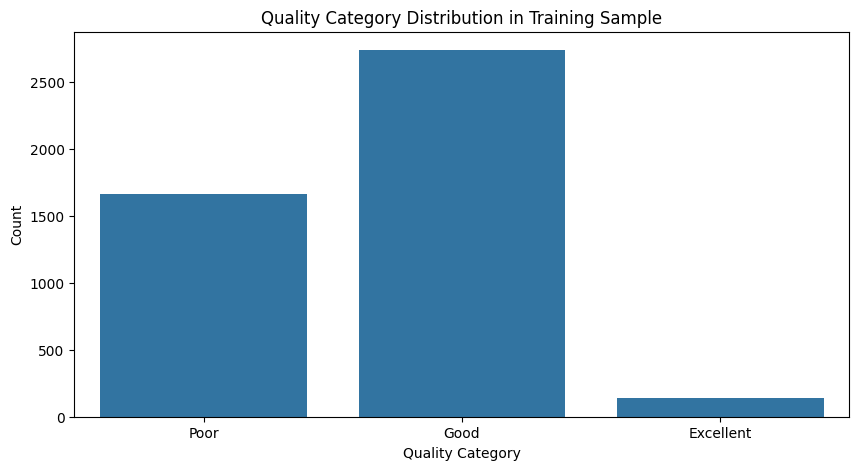


--- Feature Statistics (Training Sample) ---
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4547.000000       4547.000000  4547.000000     4547.000000   
mean        7.205971          0.338473     0.321229        5.445437   
std         1.290769          0.163807     0.146444        4.800897   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.400000        8.100000   
max        15.900000          1.330000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4547.000000          4547.000000           4547.000000  4547.000000   
mean      0.055823            30.636574            116.270838     0.994673   
std       0.034854            17.992007             56.876800     0.003040   
mi

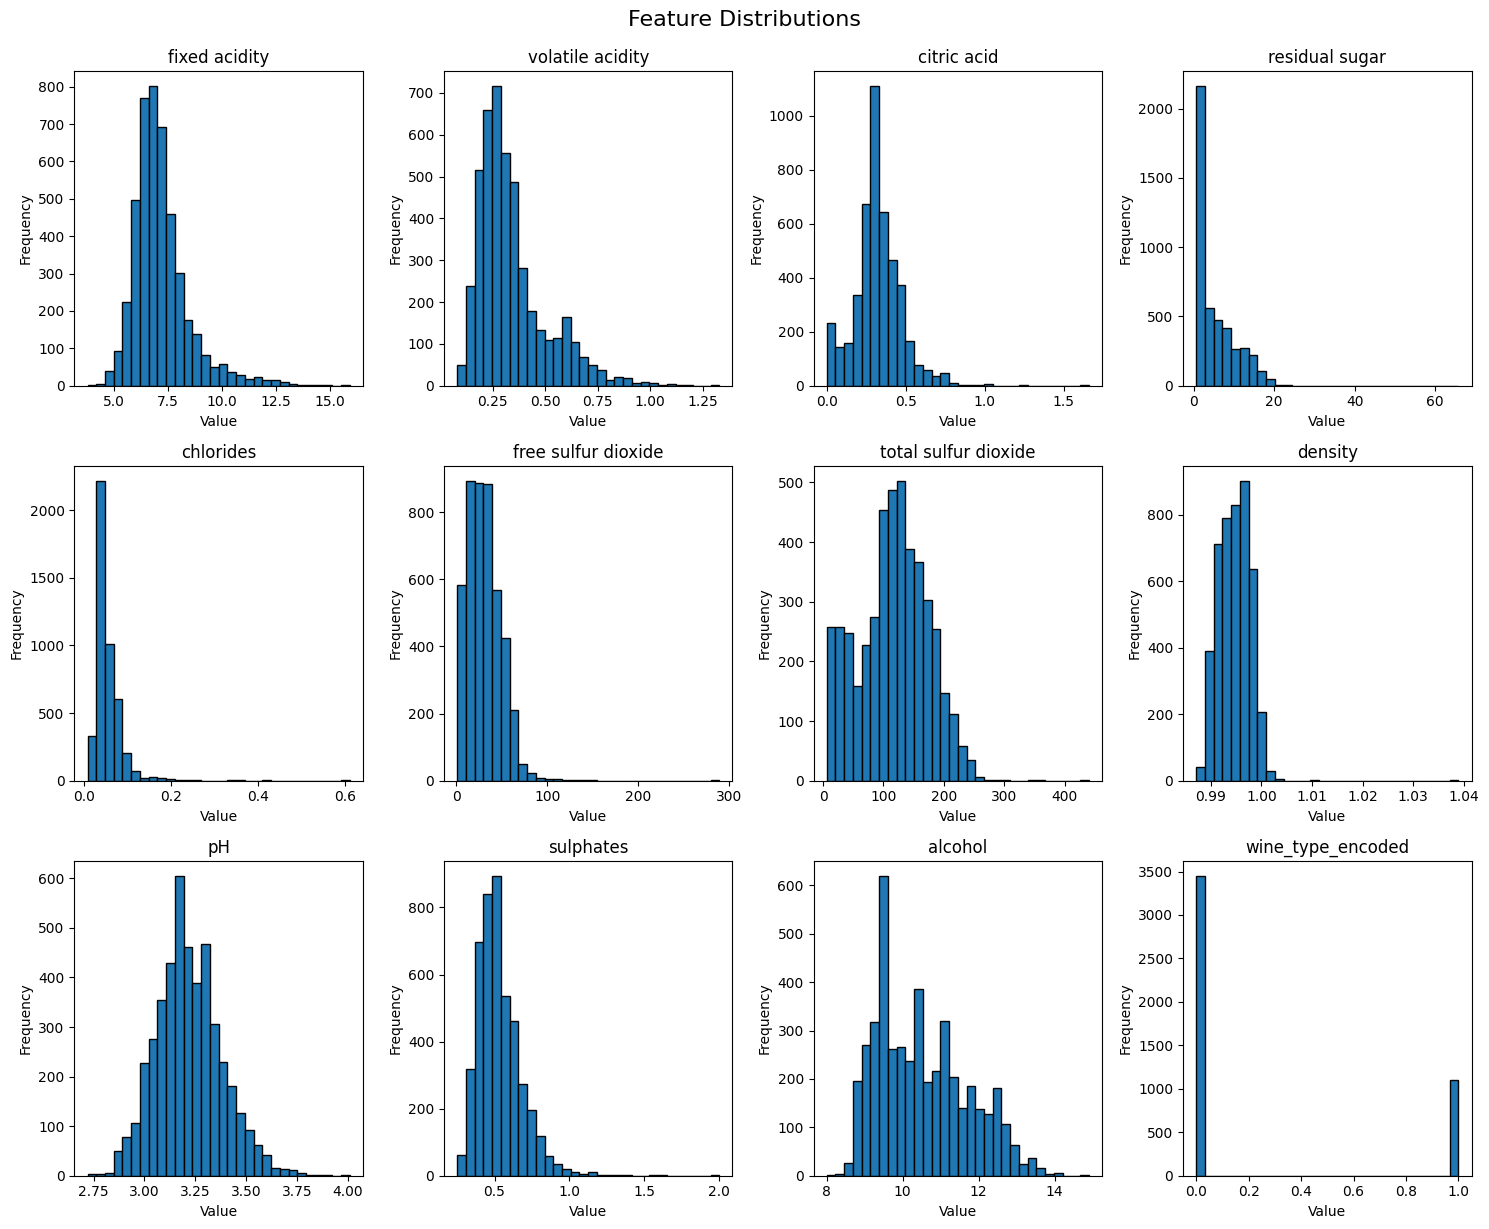

In [4]:

# ============================================================================
# CELL 3: SEMMA Step 2 - EXPLORE
# ============================================================================

print("\n" + "=" * 60)
print("SEMMA STEP 2: EXPLORE")
print("=" * 60)

# 1. Explore Target Variable Distribution
print("\n--- Target Variable Distribution (Training Set) ---")
print(y_train.value_counts(normalize=True))

plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, order=['Poor', 'Good', 'Excellent'])
plt.title('Quality Category Distribution in Training Sample')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()

# 2. Explore Feature Scales
print("\n--- Feature Statistics (Training Sample) ---")
print(X_train.describe())

# 3. Check for Missing Values
print("\n--- Missing Values Check ---")
missing_values = X_train.isnull().sum()
if missing_values.any():
    print("Missing values found:")
    print(missing_values[missing_values > 0])
else:
    print("✅ No missing values found in the dataset.")

# 4. Correlation Analysis
print("\n--- Correlation with Target (Quality) ---")
# Create a temporary dataframe for correlation
temp_df = X_train.copy()
temp_df['quality_numeric'] = df.loc[X_train.index, 'quality']
correlations = temp_df.corr()['quality_numeric'].sort_values(ascending=False)
print(correlations.head(10))

# 5. Feature Distribution Visualization
fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(X_train.columns):
    axes[idx].hist(X_train[col], bins=30, edgecolor='black')
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Feature Distributions', y=1.02, fontsize=16)
plt.show()


In [5]:

# ============================================================================
# CELL 4: SEMMA Step 3 - MODIFY
# ============================================================================

print("\n" + "=" * 60)
print("SEMMA STEP 3: MODIFY")
print("=" * 60)

# 1. Feature Scaling (Standardization)
print("\n--- Scaling Numerical Features ---")
scaler = StandardScaler()

# Fit the scaler ONLY on training data
scaler.fit(X_train)

# Transform all three sets
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✅ Features successfully scaled using StandardScaler")
print(f"   Mean of scaled training data: {X_train_scaled.mean():.4f}")
print(f"   Std of scaled training data: {X_train_scaled.std():.4f}")

# 2. Target Encoding (already categorical, but we'll encode for models)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

print("\n✅ Target variable successfully label-encoded")
print(f"   Classes: {le.classes_}")
print(f"   Example: '{y_test.iloc[0]}' -> {y_test_encoded[0]}")



SEMMA STEP 3: MODIFY

--- Scaling Numerical Features ---
✅ Features successfully scaled using StandardScaler
   Mean of scaled training data: -0.0000
   Std of scaled training data: 1.0000

✅ Target variable successfully label-encoded
   Classes: ['Excellent' 'Good' 'Poor']
   Example: 'Good' -> 1


In [6]:

# ============================================================================
# CELL 5: SEMMA Step 4 - MODEL
# ============================================================================

print("\n" + "=" * 60)
print("SEMMA STEP 4: MODEL")
print("=" * 60)

# Initialize multiple models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Train all models
trained_models = {}
print("\n--- Training Models ---")
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train_encoded)
    trained_models[name] = model
    
    # Quick validation accuracy
    val_pred = model.predict(X_val_scaled)
    val_acc = accuracy_score(y_val_encoded, val_pred)
    print(f"  Validation Accuracy: {val_acc:.4f}")

print("\n✅ All models trained successfully!")




SEMMA STEP 4: MODEL

--- Training Models ---
Training K-Nearest Neighbors...
  Validation Accuracy: 0.7385
Training Support Vector Machine...
  Validation Accuracy: 0.7672
Training Gradient Boosting...
  Validation Accuracy: 0.7692

✅ All models trained successfully!



SEMMA STEP 5: ASSESS
Assessing models on the final 15% Test Sample...

K-Nearest Neighbors
Accuracy: 0.7056
F1-Score (Weighted): 0.6983

Support Vector Machine
Accuracy: 0.7497
F1-Score (Weighted): 0.7358

Gradient Boosting
Accuracy: 0.7559
F1-Score (Weighted): 0.7486

✅ Best Model: Gradient Boosting
   F1-Score: 0.7486

--- Confusion Matrix (Best Model) ---


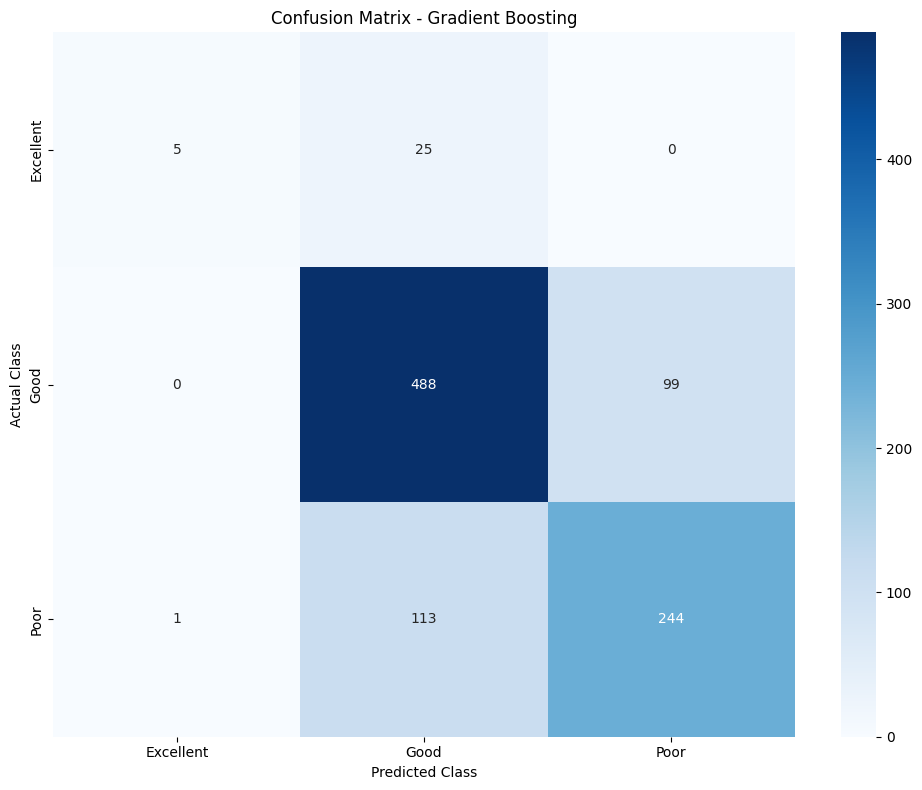


--- Classification Report (Best Model) ---
              precision    recall  f1-score   support

   Excellent       0.83      0.17      0.28        30
        Good       0.78      0.83      0.80       587
        Poor       0.71      0.68      0.70       358

    accuracy                           0.76       975
   macro avg       0.77      0.56      0.59       975
weighted avg       0.76      0.76      0.75       975


--- Model Comparison ---


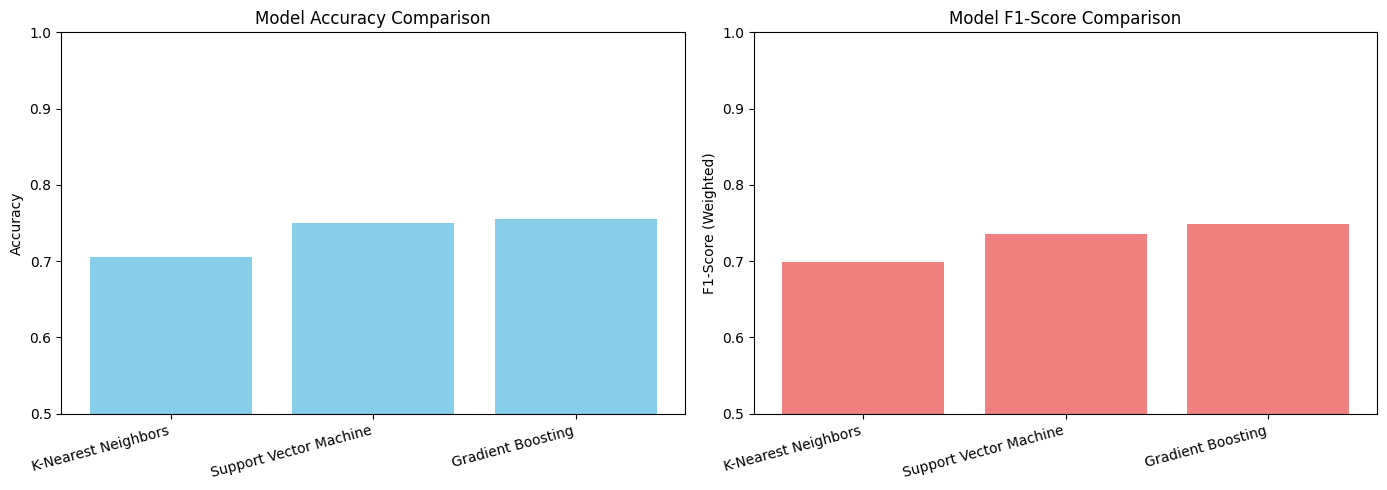


✅ WINE QUALITY CLASSIFICATION - SEMMA COMPLETE


In [7]:
# ============================================================================
# CELL 6: SEMMA Step 5 - ASSESS
# ============================================================================

print("\n" + "=" * 60)
print("SEMMA STEP 5: ASSESS")
print("=" * 60)
print("Assessing models on the final 15% Test Sample...")

best_model = None
best_f1 = -1
best_model_name = ""

# Evaluate each model
results = {}
for name, model in trained_models.items():
    print(f"\n{'='*50}")
    print(f"{name}")
    print('='*50)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    results[name] = {'accuracy': accuracy, 'f1': f1}
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score (Weighted): {f1:.4f}")
    
    # Track best model
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_model_name = name

print(f"\n{'='*50}")
print(f"✅ Best Model: {best_model_name}")
print(f"   F1-Score: {best_f1:.4f}")
print('='*50)

# Generate Confusion Matrix for Best Model
print("\n--- Confusion Matrix (Best Model) ---")
y_pred_best = best_model.predict(X_test_scaled)
cm = confusion_matrix(y_test_encoded, y_pred_best)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.tight_layout()
plt.show()

# Detailed Classification Report
print("\n--- Classification Report (Best Model) ---")
print(classification_report(y_test_encoded, y_pred_best, 
                          target_names=le.classes_))

# Model Comparison Visualization
print("\n--- Model Comparison ---")
model_names = list(results.keys())
accuracies = [results[m]['accuracy'] for m in model_names]
f1_scores = [results[m]['f1'] for m in model_names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(model_names, accuracies, color='skyblue')
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim([0.5, 1.0])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=15, ha='right')

ax2.bar(model_names, f1_scores, color='lightcoral')
ax2.set_title('Model F1-Score Comparison')
ax2.set_ylabel('F1-Score (Weighted)')
ax2.set_ylim([0.5, 1.0])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=15, ha='right')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("✅ WINE QUALITY CLASSIFICATION - SEMMA COMPLETE")
print("=" * 60)